In [377]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, classification_report



# Đọc dữ liệu 


In [378]:
df = pd.read_csv('ngan_hang_hr_data.csv')

In [379]:
df.sample(20)


,EmployeeID,FullName,Age,Gender,LocationType,LocationName,Department,JobRole,JobLevel,YearsAtCompany,YearsSinceLastPromotion,KPI_Achievement_Pct,PerformanceRating,MonthlyIncome,PercentSalaryHike,OverTime,JobSatisfaction,Attrition
9152,TCB19153,Kristin Anderson,32,Nữ,Chi nhánh,CN 07,Phòng KH Cá nhân,Chuyên viên QHKH Cá nhân,3,5,3,24.776969,4,1930.018572,11,No,3,No
5946,TCB15947,Ashley Leon,31,Nữ,Chi nhánh,CN 27,Phòng KH Doanh nghiệp,Chuyên viên QHKH Doanh nghiệp,2,5,2,32.921915,3,1720.628766,11,No,2,Yes
4761,TCB14762,Rachel Harris,33,Nữ,Hội sở chính,HSC Hà Nội,Khối Quản trị Rủi ro,Risk Analyst,2,1,0,82.171613,4,9078.945657,14,No,3,No
7119,TCB17120,Samantha Tucker,27,Nam,Hội sở chính,HSC TP.HCM,Khối Nhân sự,HR Specialist,2,2,0,82.049348,4,2468.511606,12,No,4,No
8023,TCB18024,Edward Watts,35,Nam,Hội sở chính,HSC TP.HCM,Khối Vận hành,Process Manager,4,6,6,48.468250,4,7050.575084,8,No,2,No
4392,TCB14393,Frank Melendez,32,Nữ,Chi nhánh,CN 24,Phòng Hỗ trợ Tín dụng,Chuyên viên Hỗ trợ Tín dụng,2,8,4,40.202203,4,5579.033409,15,No,4,No
7136,TCB17137,Dawn Jones,31,Nữ,Chi nhánh,CN 05,Phòng KH Doanh nghiệp,Chuyên viên QHKH Doanh nghiệp,2,1,0,84.132747,2,2646.585209,5,No,2,No
5768,TCB15769,Micheal Lopez,28,Nữ,Chi nhánh,CN 30,Phòng Hỗ trợ Tín dụng,Chuyên viên Hỗ trợ Tín dụng,2,3,0,20.207205,5,2415.725497,18,No,4,No
4472,TCB14473,Emily Dudley,36,Nam,Chi nhánh,CN 12,Phòng KH Cá nhân,Trưởng phòng QHKH Cá nhân,4,12,7,35.414820,5,7278.471607,14,No,3,Yes
1997,TCB11998,Meghan Griffin,29,Nam,Chi nhánh,CN 05,Phòng Hỗ trợ Tín dụng,Chuyên viên Hỗ trợ Tín dụng,2,3,0,26.057387,4,5246.493716,16,No,4,No


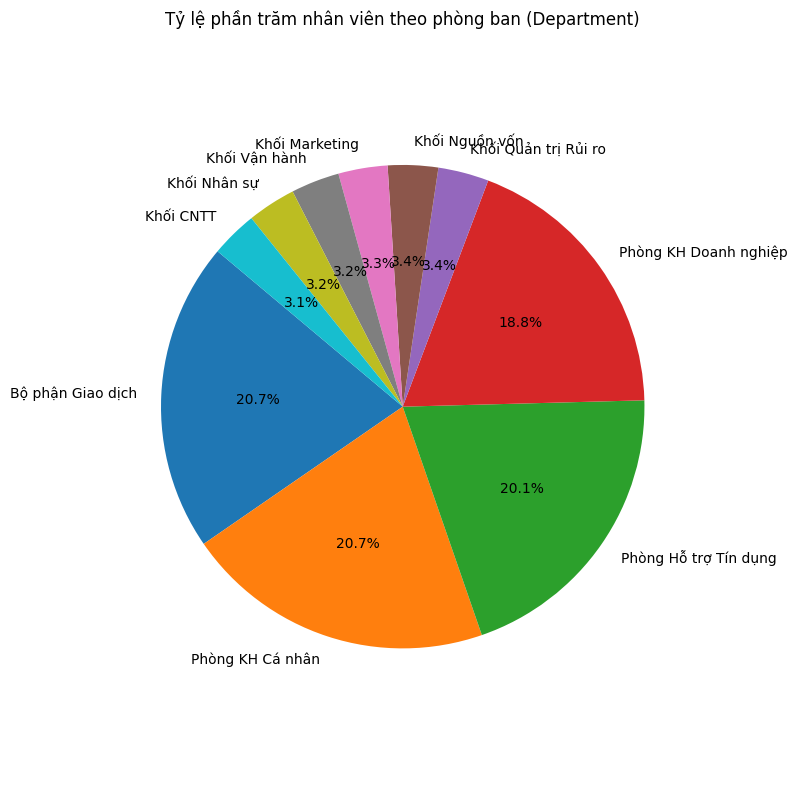

In [380]:
plt.figure(figsize=(8,8))
department_counts = df['Department'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ phần trăm nhân viên theo phòng ban (Department)')
plt.axis('equal')
plt.tight_layout()
plt.show()


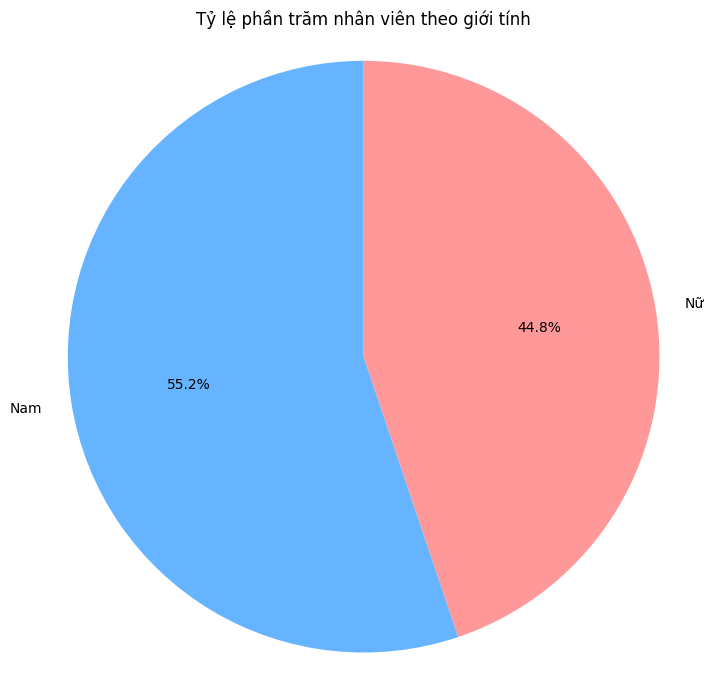

In [381]:
plt.figure(figsize=(7,7))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Tỷ lệ phần trăm nhân viên theo giới tính')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [382]:
# Thống kê mô tả cho toàn bộ dữ liệu
print("Thống kê mô tả cho các biến số:")
display(df.describe())

print("\nThống kê mô tả cho các biến phân loại:")
display(df.describe(include=['object']))

print("\nSố lượng giá trị null ở mỗi cột:")
print(df.isnull().sum())


Thống kê mô tả cho các biến số:


,Age,JobLevel,YearsAtCompany,YearsSinceLastPromotion,KPI_Achievement_Pct,PerformanceRating,MonthlyIncome,PercentSalaryHike,JobSatisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31.595600,2.540000,4.767500,2.357200,60.040874,3.457200,5123.148257,11.920900,2.752900
std,3.029947,0.976676,2.998757,2.394824,26.186404,0.772805,2858.363551,3.399088,0.777883
min,25.000000,1.000000,1.000000,0.000000,6.524380,1.000000,-138.156000,-1.000000,1.000000
25%,29.000000,2.000000,2.000000,1.000000,35.086048,3.000000,2512.038314,10.000000,2.000000
50%,32.000000,2.000000,4.000000,2.000000,61.131688,4.000000,4731.784336,12.000000,3.000000
75%,34.000000,3.000000,7.000000,4.000000,84.982138,4.000000,7744.672803,14.000000,3.000000
max,38.000000,4.000000,15.000000,15.000000,110.322236,5.000000,10800.924040,25.000000,4.000000



Thống kê mô tả cho các biến phân loại:


,EmployeeID,FullName,Gender,LocationType,LocationName,Department,JobRole,OverTime,Attrition
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,9391,2,2,32,10,21,2,2
top,TCB10001,Michael Smith,Nam,Chi nhánh,HSC TP.HCM,Bộ phận Giao dịch,Chuyên viên Hỗ trợ Tín dụng,No,No
freq,1,8,5518,8036,1003,2072,2011,8324,8046



Số lượng giá trị null ở mỗi cột:
EmployeeID                 0
FullName                   0
Age                        0
Gender                     0
LocationType               0
LocationName               0
Department                 0
JobRole                    0
JobLevel                   0
YearsAtCompany             0
YearsSinceLastPromotion    0
KPI_Achievement_Pct        0
PerformanceRating          0
MonthlyIncome              0
PercentSalaryHike          0
OverTime                   0
JobSatisfaction            0
Attrition                  0
dtype: int64


# Tiền xử lý dữ liệu

In [383]:
drop_cols = ['EmployeeID', 'FullName']
df = df.drop(columns=drop_cols)

In [384]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [385]:
# Loại bỏ các dòng có MonthlyIncome hoặc PercentSalaryHike nhỏ hơn 0
df = df[(df['MonthlyIncome'] >= 0) & (df['PercentSalaryHike'] >= 0)]

In [386]:
df['Department_Raw'] = df['Department']

In [387]:
df['Department_Raw']

0        Khối Quản trị Rủi ro
1                   Khối CNTT
2       Phòng Hỗ trợ Tín dụng
3           Bộ phận Giao dịch
4               Khối Vận hành
                ...          
9995        Bộ phận Giao dịch
9996        Bộ phận Giao dịch
9997        Bộ phận Giao dịch
9998                Khối CNTT
9999    Phòng Hỗ trợ Tín dụng
Name: Department_Raw, Length: 9997, dtype: object

In [388]:
cat_cols = ['Gender', 'LocationType', 'LocationName', 'JobRole', 'OverTime','Department']
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)

In [389]:
df.describe()

,Age,JobLevel,YearsAtCompany,YearsSinceLastPromotion,KPI_Achievement_Pct,PerformanceRating,MonthlyIncome,PercentSalaryHike,JobSatisfaction,Attrition
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,31.594578,2.539762,4.766330,2.356607,60.043016,3.457337,5123.784209,11.921877,2.752926,0.195459
std,3.029596,0.976589,2.998301,2.394925,26.186567,0.772751,2857.525315,3.397060,0.777956,0.396573
min,25.000000,1.000000,1.000000,0.000000,6.524380,1.000000,45.067963,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,1.000000,35.086282,3.000000,2512.927100,10.000000,2.000000,0.000000
50%,32.000000,2.000000,4.000000,2.000000,61.988025,4.000000,4785.004514,12.000000,3.000000,0.000000
75%,34.000000,3.000000,7.000000,4.000000,84.980981,4.000000,7743.743096,14.000000,3.000000,0.000000
max,38.000000,4.000000,15.000000,15.000000,110.322236,5.000000,10800.924040,25.000000,4.000000,1.000000


In [390]:
df.sample(20)

,Age,JobLevel,YearsAtCompany,YearsSinceLastPromotion,KPI_Achievement_Pct,PerformanceRating,MonthlyIncome,PercentSalaryHike,JobSatisfaction,Attrition,...,Department_Bộ phận Giao dịch,Department_Khối CNTT,Department_Khối Marketing,Department_Khối Nguồn vốn,Department_Khối Nhân sự,Department_Khối Quản trị Rủi ro,Department_Khối Vận hành,Department_Phòng Hỗ trợ Tín dụng,Department_Phòng KH Cá nhân,Department_Phòng KH Doanh nghiệp
8010,32,2,3,2,84.680366,4,2112.444571,11,3,0,...,False,False,False,False,False,False,False,True,False,False
9975,28,2,3,1,92.389779,4,3919.036503,14,3,0,...,True,False,False,False,False,False,False,False,False,False
3924,36,4,3,0,12.163715,4,2185.116843,12,3,0,...,False,False,False,False,False,False,False,False,True,False
655,31,3,4,3,83.854995,4,2568.571442,15,3,0,...,False,False,False,True,False,False,False,False,False,False
533,27,2,1,0,29.813195,4,2104.037101,10,3,0,...,False,False,False,False,False,False,False,True,False,False
1518,34,2,2,0,38.209565,3,1492.396832,11,2,1,...,False,False,False,False,False,False,False,True,False,False
9843,32,4,2,1,88.199993,4,9441.075282,13,3,0,...,False,False,False,False,False,False,False,False,True,False
8506,37,4,10,2,87.587749,5,2860.009243,15,3,0,...,False,False,False,False,False,False,False,False,True,False
2077,33,4,6,3,78.421560,2,3037.360965,14,2,0,...,False,False,False,False,False,False,False,False,False,True
1196,32,4,5,1,39.723514,4,1633.178125,10,3,1,...,False,False,False,False,False,False,False,False,True,False


# Xử lý dữ liệu


In [391]:
X = df.drop(columns=["Attrition", "Department_Raw"]).values
y = df["Attrition"].values

In [392]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

c:\Users\ASUS\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\miniconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\ASUS\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [393]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [394]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Tạo tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64)

In [395]:
class SimpleNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=10, output_size=1):
        super(SimpleNN, self).__init__()
        # Lớp fully-connected từ input đến hidden
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Hàm kích hoạt ReLU
        self.relu = nn.ReLU()
        # Lớp fully-connected từ hidden đến output
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)      # Tính lớp đầu tiên
        out = self.relu(out)   # Áp dụng hàm kích hoạt
        out = self.fc2(out)    # Tính lớp output
        return out

In [396]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepANN(input_size=X_train.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [397]:
train_losses = []
val_losses = []

EPOCHS = 50
for epoch in range(EPOCHS):
    # Training
    model.train()
    train_loss = 0
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            outputs = model(xb)
            loss = criterion(outputs, yb)
            val_loss += loss.item() * xb.size(0)
    val_loss /= len(test_loader.dataset)
    val_losses.append(val_loss)
    
    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")


Epoch 1/50 - Train Loss: 0.1637 - Val Loss: 0.5972


Epoch 2/50 - Train Loss: 0.1410 - Val Loss: 0.5282
Epoch 3/50 - Train Loss: 0.1270 - Val Loss: 0.4840
Epoch 4/50 - Train Loss: 0.1179 - Val Loss: 0.4552
Epoch 5/50 - Train Loss: 0.1119 - Val Loss: 0.4352
Epoch 6/50 - Train Loss: 0.1075 - Val Loss: 0.4199
Epoch 7/50 - Train Loss: 0.1041 - Val Loss: 0.4076
Epoch 8/50 - Train Loss: 0.1013 - Val Loss: 0.3978
Epoch 9/50 - Train Loss: 0.0991 - Val Loss: 0.3898
Epoch 10/50 - Train Loss: 0.0974 - Val Loss: 0.3833
Epoch 11/50 - Train Loss: 0.0959 - Val Loss: 0.3779
Epoch 12/50 - Train Loss: 0.0947 - Val Loss: 0.3732
Epoch 13/50 - Train Loss: 0.0936 - Val Loss: 0.3690
Epoch 14/50 - Train Loss: 0.0926 - Val Loss: 0.3652
Epoch 15/50 - Train Loss: 0.0917 - Val Loss: 0.3617
Epoch 16/50 - Train Loss: 0.0909 - Val Loss: 0.3586
Epoch 17/50 - Train Loss: 0.0901 - Val Loss: 0.3557
Epoch 18/50 - Train Loss: 0.0894 - Val Loss: 0.3528
Epoch 19/50 - Train Loss: 0.0887 - Val Loss: 0.3500
Epoch 20/50 - Train Loss: 0.0881 - Val Loss: 0.3475
Epoch 21/50 - Train 

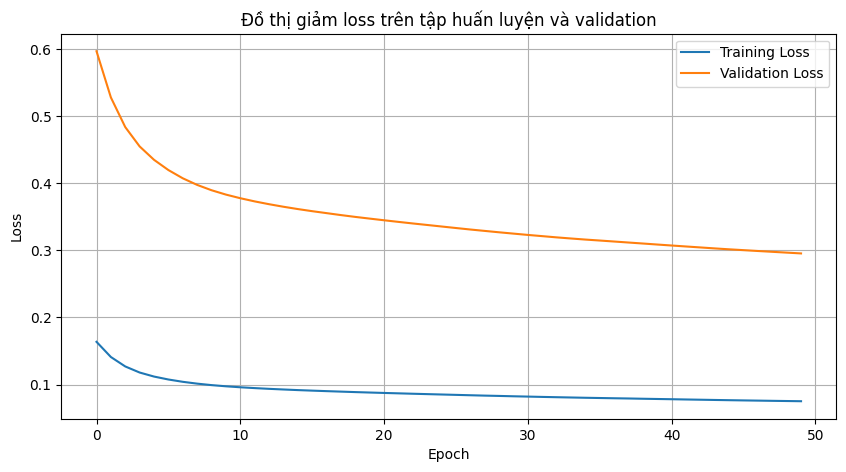

In [398]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Đồ thị giảm loss trên tập huấn luyện và validation')
plt.legend()
plt.grid(True)
plt.show()


In [399]:

loss_list = []
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    loss_list.append(avg_loss)
    print(f"Epoch {epoch+1}/{EPOCHS} - Avg Loss: {avg_loss:.4f}")


Epoch 1/50 - Avg Loss: 0.4498
Epoch 2/50 - Avg Loss: 0.4219
Epoch 3/50 - Avg Loss: 0.4124
Epoch 4/50 - Avg Loss: 0.4060
Epoch 5/50 - Avg Loss: 0.4017
Epoch 6/50 - Avg Loss: 0.3976
Epoch 7/50 - Avg Loss: 0.3946
Epoch 8/50 - Avg Loss: 0.3922
Epoch 9/50 - Avg Loss: 0.3901
Epoch 10/50 - Avg Loss: 0.3881
Epoch 11/50 - Avg Loss: 0.3866
Epoch 12/50 - Avg Loss: 0.3854
Epoch 13/50 - Avg Loss: 0.3840
Epoch 14/50 - Avg Loss: 0.3821
Epoch 15/50 - Avg Loss: 0.3815
Epoch 16/50 - Avg Loss: 0.3803
Epoch 17/50 - Avg Loss: 0.3793
Epoch 18/50 - Avg Loss: 0.3784
Epoch 19/50 - Avg Loss: 0.3779
Epoch 20/50 - Avg Loss: 0.3773
Epoch 21/50 - Avg Loss: 0.3766
Epoch 22/50 - Avg Loss: 0.3758
Epoch 23/50 - Avg Loss: 0.3756
Epoch 24/50 - Avg Loss: 0.3743
Epoch 25/50 - Avg Loss: 0.3742
Epoch 26/50 - Avg Loss: 0.3737
Epoch 27/50 - Avg Loss: 0.3734
Epoch 28/50 - Avg Loss: 0.3732
Epoch 29/50 - Avg Loss: 0.3725
Epoch 30/50 - Avg Loss: 0.3723
Epoch 31/50 - Avg Loss: 0.3715
Epoch 32/50 - Avg Loss: 0.3716
Epoch 33/50 - Avg

In [400]:
print(len(loss_list), EPOCHS)


50 50


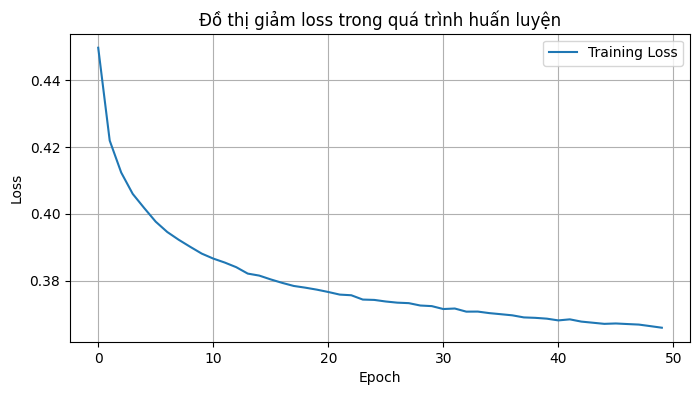

In [401]:
# Vẽ đồ thị loss trong quá trình huấn luyện
plt.figure(figsize=(8,4))
plt.plot(range(EPOCHS), loss_list, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Đồ thị giảm loss trong quá trình huấn luyện")
plt.legend()
plt.grid(True)
plt.show()

In [402]:
model.eval()


DeepANN(
  (fc1): Linear(in_features=78, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)

In [403]:
with torch.no_grad():
    y_pred_logits = model(X_test_tensor.to(device))
    y_pred = torch.argmax(y_pred_logits, dim=1).cpu().numpy()
    y_pred_proba = torch.softmax(y_pred_logits, dim=1)[:, 1].cpu().numpy()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.828
              precision    recall  f1-score   support

           0     0.8547    0.9472    0.8986      1609
           1     0.6083    0.3376    0.4342       391

    accuracy                         0.8280      2000
   macro avg     0.7315    0.6424    0.6664      2000
weighted avg     0.8066    0.8280    0.8078      2000



In [404]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

model.eval()
all_probs = []
all_labels = []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        outputs = model(xb)
        probs = torch.softmax(outputs, dim=1)[:,1]
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(yb.numpy())
all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

In [405]:
# 10. Chạy thử nhiều threshold khác nhau
threshold_list = [0.2, 0.3, 0.4, 0.5]
for thr in threshold_list:
    preds = (all_probs > thr).astype(int)
    print(f"\nClassification report (threshold={thr}):")
    print(classification_report(all_labels, preds, digits=4))
    print("Confusion matrix:")
    print(confusion_matrix(all_labels, preds))


Classification report (threshold=0.2):
              precision    recall  f1-score   support

           0     0.9169    0.7470    0.8233      1609
           1     0.4093    0.7212    0.5222       391

    accuracy                         0.7420      2000
   macro avg     0.6631    0.7341    0.6728      2000
weighted avg     0.8176    0.7420    0.7644      2000

Confusion matrix:
[[1202  407]
 [ 109  282]]

Classification report (threshold=0.3):
              precision    recall  f1-score   support

           0     0.8822    0.8428    0.8620      1609
           1     0.4536    0.5371    0.4918       391

    accuracy                         0.7830      2000
   macro avg     0.6679    0.6899    0.6769      2000
weighted avg     0.7984    0.7830    0.7897      2000

Confusion matrix:
[[1356  253]
 [ 181  210]]

Classification report (threshold=0.4):
              precision    recall  f1-score   support

           0     0.8660    0.9037    0.8844      1609
           1     0.5171    

<Figure size 600x600 with 0 Axes>

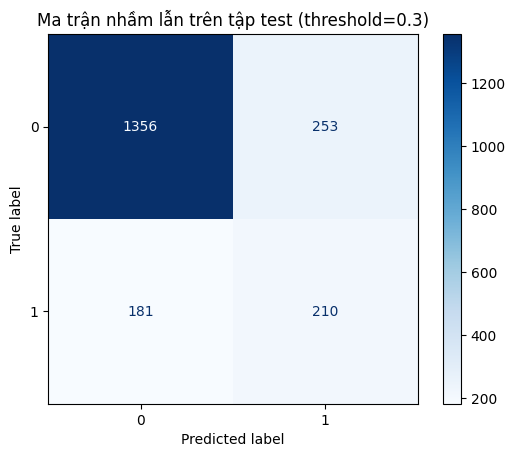

In [406]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sử dụng threshold = 0.3 để phân loại lại nhãn dự đoán
y_pred_thr03 = (y_pred_proba > 0.3).astype(int)

# Tính toán ma trận nhầm lẫn với threshold = 0.3
cm = confusion_matrix(y_test, y_pred_thr03)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Ma trận nhầm lẫn trên tập test (threshold=0.3)")
plt.show()


In [407]:
feature_cols = df.drop(columns=["Attrition", "Department_Raw"]).columns  # (giả sử dùng pandas)
print("Danh sách cột dùng cho model:", list(feature_cols))


Danh sách cột dùng cho model: ['Age', 'JobLevel', 'YearsAtCompany', 'YearsSinceLastPromotion', 'KPI_Achievement_Pct', 'PerformanceRating', 'MonthlyIncome', 'PercentSalaryHike', 'JobSatisfaction', 'Gender_Nam', 'Gender_Nữ', 'LocationType_Chi nhánh', 'LocationType_Hội sở chính', 'LocationName_CN 01', 'LocationName_CN 02', 'LocationName_CN 03', 'LocationName_CN 04', 'LocationName_CN 05', 'LocationName_CN 06', 'LocationName_CN 07', 'LocationName_CN 08', 'LocationName_CN 09', 'LocationName_CN 10', 'LocationName_CN 11', 'LocationName_CN 12', 'LocationName_CN 13', 'LocationName_CN 14', 'LocationName_CN 15', 'LocationName_CN 16', 'LocationName_CN 17', 'LocationName_CN 18', 'LocationName_CN 19', 'LocationName_CN 20', 'LocationName_CN 21', 'LocationName_CN 22', 'LocationName_CN 23', 'LocationName_CN 24', 'LocationName_CN 25', 'LocationName_CN 26', 'LocationName_CN 27', 'LocationName_CN 28', 'LocationName_CN 29', 'LocationName_CN 30', 'LocationName_HSC Hà Nội', 'LocationName_HSC TP.HCM', 'JobRole

In [408]:
# Tạo một dict mẫu, điền các giá trị cụ thể, các biến còn lại = 0 hoặc giá trị mặc định (mean/median)
input_dict = {col: 0 for col in feature_cols}
input_dict["Age"] = 32
input_dict["YearsAtCompany"] = 1
input_dict["MonthlyIncome"] = 1000
input_dict["KPI_Achievement_Pct"] = 89
input_dict["PerformanceRating"] = 1
input_dict["JobLevel"] = 5
input_dict["JobSatisfaction"] = 3
# ... điền đủ các feature bạn quan tâm

# Chuyển thành dataframe 1 dòng
new_employee_df = pd.DataFrame([input_dict])

# Scale
new_employee_scaled = scaler.transform(new_employee_df)

# Predict
new_employee_tensor = torch.tensor(new_employee_scaled, dtype=torch.float32).to(device)
model.eval()
with torch.no_grad():
    output = model(new_employee_tensor)
    prob = torch.softmax(output, dim=1)[:, 1].cpu().item()
    label = int(prob > 0.5)
print(f"Xác suất nghỉ việc: {prob:.3f}, Dự đoán: {'Nghỉ việc' if label else 'Không nghỉ việc'}")


Xác suất nghỉ việc: 0.647, Dự đoán: Nghỉ việc


c:\Users\ASUS\miniconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [409]:
# 1. Toàn bộ feature đầu vào (numpy array)
x_all_np = X_scaled  # Đã ở dạng numpy, không cần squeeze hay .numpy() nữa

# 2. Nhãn thực tế
y_true_np = y  # hoặc y.to_numpy(), đều ra numpy array

# 3. Dự đoán của model
y_pred_np = predictions.cpu().numpy().squeeze()  # Đảm bảo đưa về numpy và loại chiều thừa


# Clustering với Autoencoder và KMeans


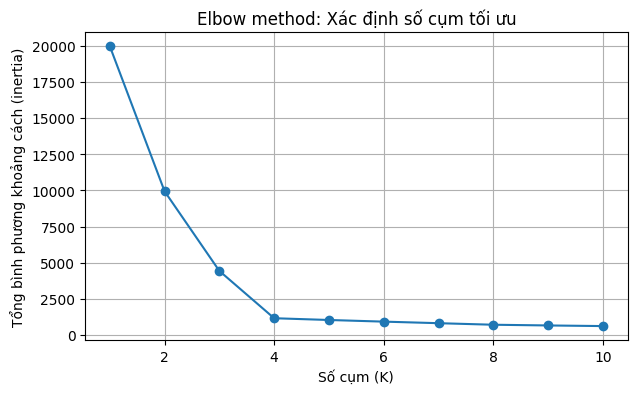

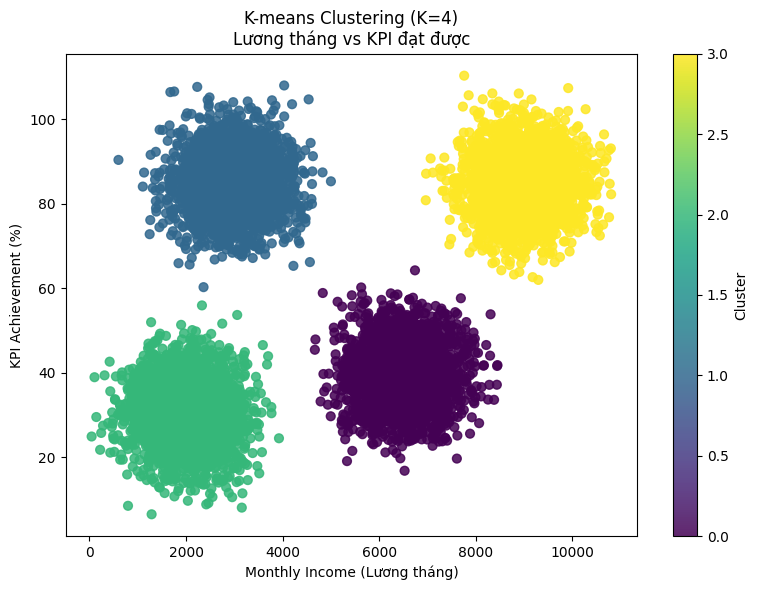

In [410]:
from sklearn.cluster import KMeans

X_cluster = df[["MonthlyIncome", "KPI_Achievement_Pct"]].copy()

# 2. Chuẩn hóa 2 cột này (rất nên chuẩn hóa để tránh lệch thang đo)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# 3. Tìm số cụm tối ưu với Elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Số cụm (K)')
plt.ylabel('Tổng bình phương khoảng cách (inertia)')
plt.title('Elbow method: Xác định số cụm tối ưu')
plt.grid()
plt.show()

# 4. Chọn số cụm hợp lý (ví dụ 3 hoặc theo Elbow plot bạn quan sát)
K_best = 4  # Điều chỉnh theo Elbow plot thực tế của bạn!
kmeans = KMeans(n_clusters=K_best, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# 5. Vẽ scatter phân cụm
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_cluster["MonthlyIncome"], X_cluster["KPI_Achievement_Pct"],
    c=labels, cmap='viridis', s=40, alpha=0.85
)
plt.xlabel("Monthly Income (Lương tháng)")
plt.ylabel("KPI Achievement (%)")
plt.title(f"K-means Clustering (K={K_best})\nLương tháng vs KPI đạt được")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()


Thống kê số lượng Department trong từng cụm:
Department_Raw  Bộ phận Giao dịch  Khối CNTT  Khối Marketing  Khối Nguồn vốn  \
Cluster                                                                        
0                             491         70              67              86   
1                             498         89              86              77   
2                             537         77              82              92   
3                             546         76              94              80   

Department_Raw  Khối Nhân sự  Khối Quản trị Rủi ro  Khối Vận hành  \
Cluster                                                             
0                        100                    88             73   
1                         79                    72             86   
2                         71                    95             78   
3                         74                    84             87   

Department_Raw  Phòng Hỗ trợ Tín dụng  Phòng KH Cá nhân  Ph

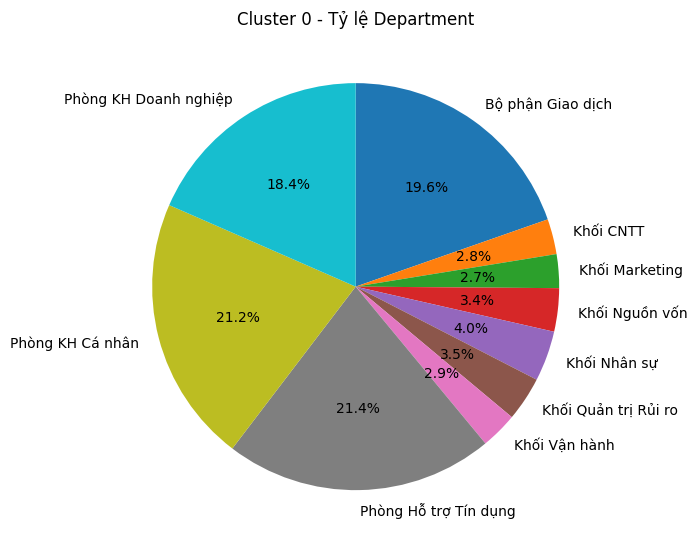

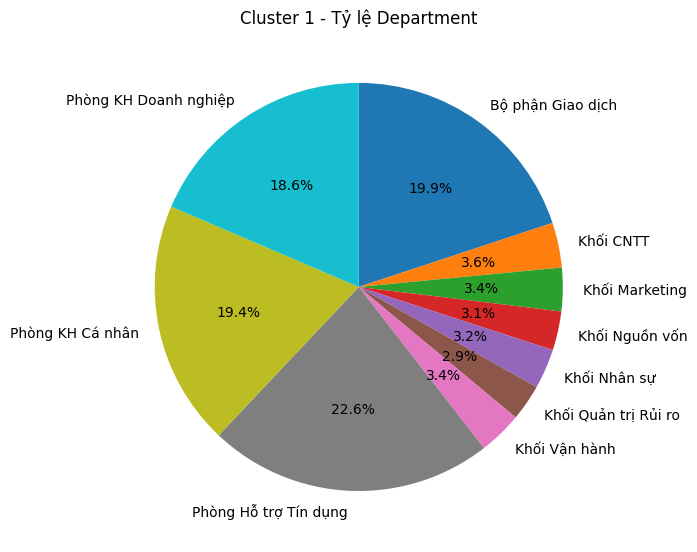

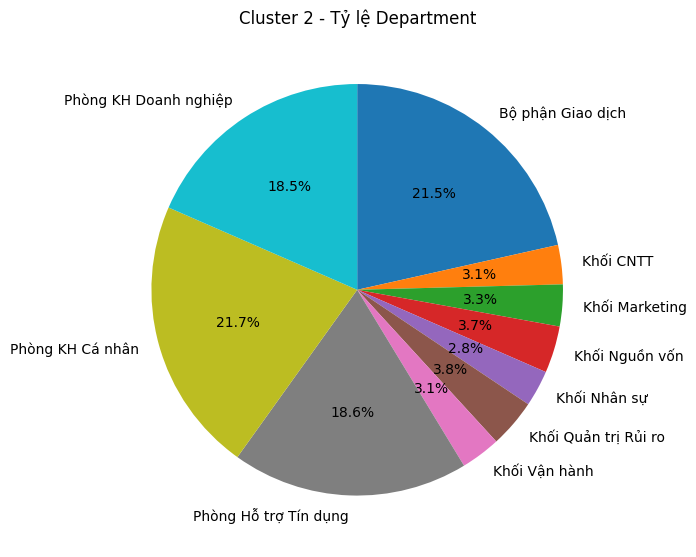

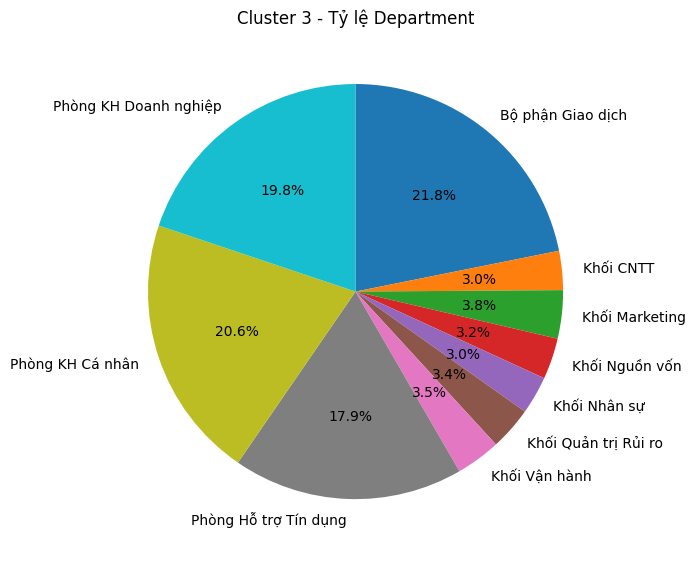

In [411]:
# Thống kê số lượng Department trong từng cụm (cluster)
df_clustered = df.copy()
df_clustered['Cluster'] = labels

# Đếm số lượng phòng ban (Department) trong từng cụm
department_counts = df_clustered.groupby('Cluster')['Department_Raw'].value_counts().unstack(fill_value=0)

print("Thống kê số lượng Department trong từng cụm:")
print(department_counts)

# Vẽ từng biểu đồ tròn riêng biệt cho từng cụm
for cluster, row in department_counts.iterrows():
    plt.figure(figsize=(7, 7))
    sizes = row.values
    labels_pie = row.index
    plt.pie(
        sizes, 
        labels=labels_pie, 
        autopct='%1.1f%%', 
        startangle=90, 
        counterclock=False
    )
    plt.title(f'Cluster {cluster} - Tỷ lệ Department')
    plt.tight_layout()
    plt.show()


In [412]:
from sklearn.preprocessing import LabelEncoder

Epoch 1/50 - Loss: 0.7329
Epoch 10/50 - Loss: 0.2326
Epoch 20/50 - Loss: 0.1886
Epoch 30/50 - Loss: 0.1698
Epoch 40/50 - Loss: 0.1615
Epoch 50/50 - Loss: 0.1536


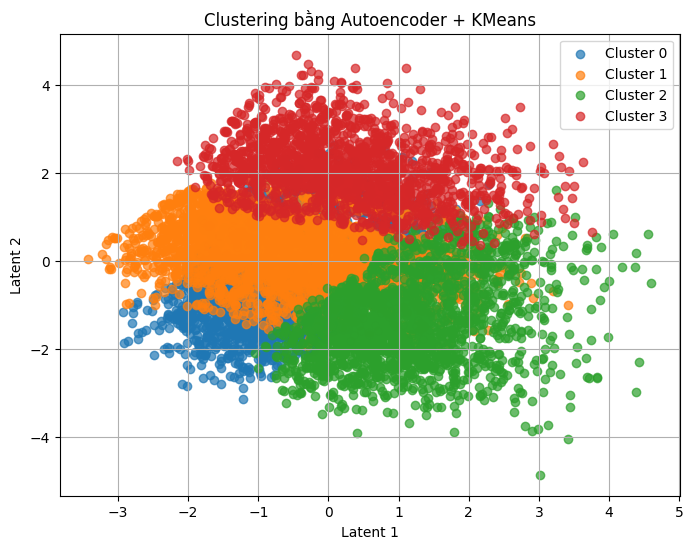

               Age  YearsAtCompany  YearsSinceLastPromotion  \
Cluster                                                       
0        30.253816        2.829606                 1.155485   
1        32.269560        5.040154                 2.447889   
2        33.602681        7.725227                 4.309718   
3        30.007629        3.796362                 1.766432   

         KPI_Achievement_Pct  MonthlyIncome  PercentSalaryHike  Department_Raw  
Cluster                                                                         
0                  34.730214    4127.696440          12.099042        5.297480  
1                  84.921245    6058.548851          11.949218        7.550044  
2                  36.297402    4195.425111          12.168502        6.089517  
3                  81.550171    6050.587942          11.272300        0.740610  


In [413]:
feature_cols = []
for c in df.columns:
    if df[c].dtype in [np.float64, np.int64] and len(df[c].unique()) > 8:
        feature_cols.append(c)
# Nếu có biến phân loại thì encode
for c in df.columns:
    if df[c].dtype == 'object' or df[c].dtype.name == 'category':
        le = LabelEncoder()
        df[c] = le.fit_transform(df[c].astype(str))
        feature_cols.append(c)
X = df[feature_cols].fillna(0).values  # Thay thế giá trị thiếu

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Xây dựng autoencoder đơn giản
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=2):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )
    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed
    def encode(self, x):
        return self.encoder(x)

# 4. Training autoencoder
input_dim = X_scaled.shape[1]
latent_dim = 3   # Bạn có thể tăng lên 3 nếu muốn
autoencoder = Autoencoder(input_dim, latent_dim)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)
criterion = nn.MSELoss()

# Tạo DataLoader
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
dataset = TensorDataset(X_tensor)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Train
n_epochs = 50
for epoch in range(n_epochs):
    autoencoder.train()
    epoch_loss = 0
    for batch in loader:
        x_batch = batch[0]
        optimizer.zero_grad()
        x_hat = autoencoder(x_batch)
        loss = criterion(x_hat, x_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * x_batch.size(0)
    epoch_loss /= len(X_scaled)
    if (epoch+1)%10 == 0 or epoch==0:
        print(f"Epoch {epoch+1}/{n_epochs} - Loss: {epoch_loss:.4f}")

# 5. Trích xuất latent space
autoencoder.eval()
with torch.no_grad():
    latent_vec = autoencoder.encode(X_tensor).numpy()

# 6. Chạy KMeans trên latent vector
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(latent_vec)

# 7. Vẽ kết quả phân cụm (2 chiều)
plt.figure(figsize=(8,6))
for i in range(n_clusters):
    idx = cluster_labels == i
    plt.scatter(latent_vec[idx, 0], latent_vec[idx, 1], label=f'Cluster {i}', alpha=0.7)
plt.xlabel('Latent 1')
plt.ylabel('Latent 2')
plt.title('Clustering bằng Autoencoder + KMeans')
plt.legend()
plt.grid(True)
plt.show()

# 8. Phân tích bảng cụm
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels
print(df_clustered.groupby('Cluster')[feature_cols].mean())

Trung bình các feature cho mỗi cluster:
    Feature 1  Feature 2  Feature 3
0  -0.657960  -0.428959   1.624640
1  -0.559611   0.233219  -1.594638
2   1.106393  -1.347582   0.740714
3   0.243348   2.099415  -0.315851


<Figure size 1000x600 with 0 Axes>

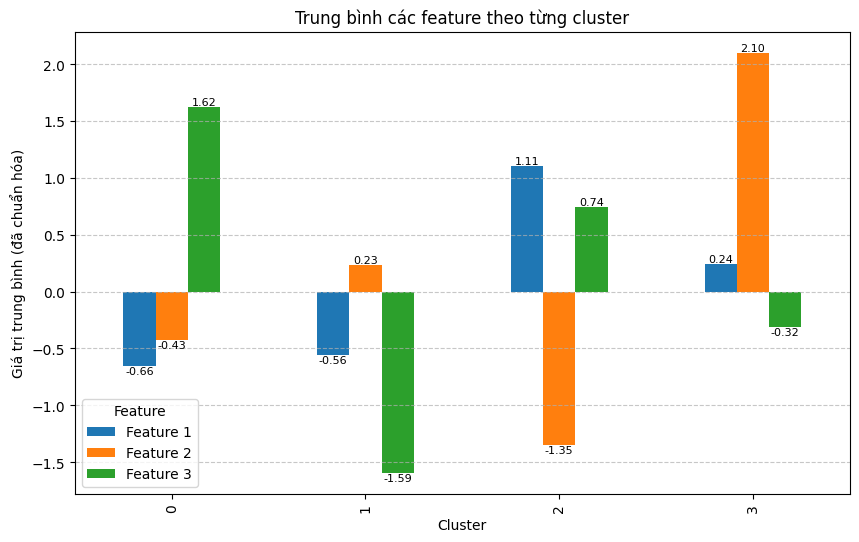

In [414]:
# Sửa lỗi: sử dụng đúng biến cluster_labels và X_scaled (hoặc latent_vec) thay vì 'clusters' và 'features'
# Đặt tên cho các feature đúng với feature_cols của DataFrame gốc

# Lấy lại feature_names từ feature_cols nếu có
feature_names = feature_cols if 'feature_cols' in locals() else ["Sex", "Age", "Fare", "SibSp", "Parch", "Embarked", "Survived"]

# Sử dụng latent_vec (hoặc X_scaled) và cluster_labels từ KMeans
features = latent_vec if 'latent_vec' in locals() else X_scaled
clusters = cluster_labels if 'cluster_labels' in locals() else None

if clusters is None:
    raise ValueError("Không tìm thấy biến cluster_labels hoặc clusters.")

# Tính giá trị trung bình của mỗi feature theo từng cluster
cluster_means = {}
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    cluster_indices = np.where(clusters == cluster)[0]
    cluster_features = features[cluster_indices]
    cluster_mean = np.mean(cluster_features, axis=0)
    cluster_means[cluster] = cluster_mean

# Nếu số chiều của features không khớp với feature_names, chỉ lấy số lượng tên tương ứng
if features.shape[1] != len(feature_names):
    feature_names = [f"Feature {i+1}" for i in range(features.shape[1])]

df_cluster = pd.DataFrame(cluster_means, index=feature_names).T
print("Trung bình các feature cho mỗi cluster:\n", df_cluster)

# Vẽ biểu đồ cột so sánh giá trị trung bình các feature theo từng cluster
plt.figure(figsize=(10, 6))
ax = df_cluster.plot(kind="bar", figsize=(10,6))
plt.title("Trung bình các feature theo từng cluster")
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình (đã chuẩn hóa)")
plt.legend(title="Feature")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm label trên mỗi cột với giá trị trung bình (không phải tên feature)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=8)

plt.show()


In [415]:
df_clustered.groupby('Cluster')[feature_cols].mean()


,Age,YearsAtCompany,YearsSinceLastPromotion,KPI_Achievement_Pct,MonthlyIncome,PercentSalaryHike,Department_Raw
Cluster,,,,,,,
0,30.253816,2.829606,1.155485,34.730214,4127.696440,12.099042,5.297480
1,32.269560,5.040154,2.447889,84.921245,6058.548851,11.949218,7.550044
2,33.602681,7.725227,4.309718,36.297402,4195.425111,12.168502,6.089517
3,30.007629,3.796362,1.766432,81.550171,6050.587942,11.272300,0.740610


In [416]:
feature_cols = ['Age', 'YearsAtCompany', 'YearsSinceLastPromotion', 'KPI_Achievement_Pct', 'MonthlyIncome', 'PercentSalaryHike']
X = df[feature_cols].fillna(0).values.astype(np.float32)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tạo DataLoader cho Lightning
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
dataset = TensorDataset(X_tensor)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

# 3. Định nghĩa Autoencoder bằng PyTorch Lightning
class AutoencoderLightning(pl.LightningModule):
    def __init__(self, input_dim, latent_dim=2, lr=0.001):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )
        self.criterion = nn.MSELoss()
        self.lr = lr
    def forward(self, x):
        latent = self.encoder(x)
        recon = self.decoder(latent)
        return recon
    def encode(self, x):
        return self.encoder(x)
    def training_step(self, batch, batch_idx):
        x = batch[0] if isinstance(batch, (tuple, list)) else batch
        recon = self.forward(x)
        loss = self.criterion(recon, x)
        self.log("train_loss", loss, prog_bar=True)
        return loss
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)

# 4. Huấn luyện Autoencoder
autoencoder = AutoencoderLightning(input_dim=X_scaled.shape[1], latent_dim=2, lr=1e-3)
trainer = pl.Trainer(max_epochs=50, accelerator='auto', devices='auto', logger=False, enable_progress_bar=False)
trainer.fit(autoencoder, loader)

# 5. Lấy latent vector
autoencoder.eval()
with torch.no_grad():
    latent_vec = autoencoder.encode(X_tensor).cpu().numpy()

# 6. Chạy KMeans clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(latent_vec)
df['Cluster'] = cluster_labels

# 7. Vẽ kết quả phân cụm trên latent space 2D
plt.figure(figsize=(8,6))
for i in range(n_clusters):
    idx = cluster_labels == i
    plt.scatter(latent_vec[idx, 0], latent_vec[idx, 1], label=f'Cluster {i}', alpha=0.7)
plt.xlabel('Latent 1')
plt.ylabel('Latent 2')
plt.title('Clustering trên Latent Space (Autoencoder Lightning + KMeans)')
plt.legend()
plt.grid(True)
plt.show()

# 8. Bảng đặc trưng trung bình các cụm (dành cho phân tích HR)
print(df.groupby('Cluster')[feature_cols].mean())

NameError: name 'pl' is not defined

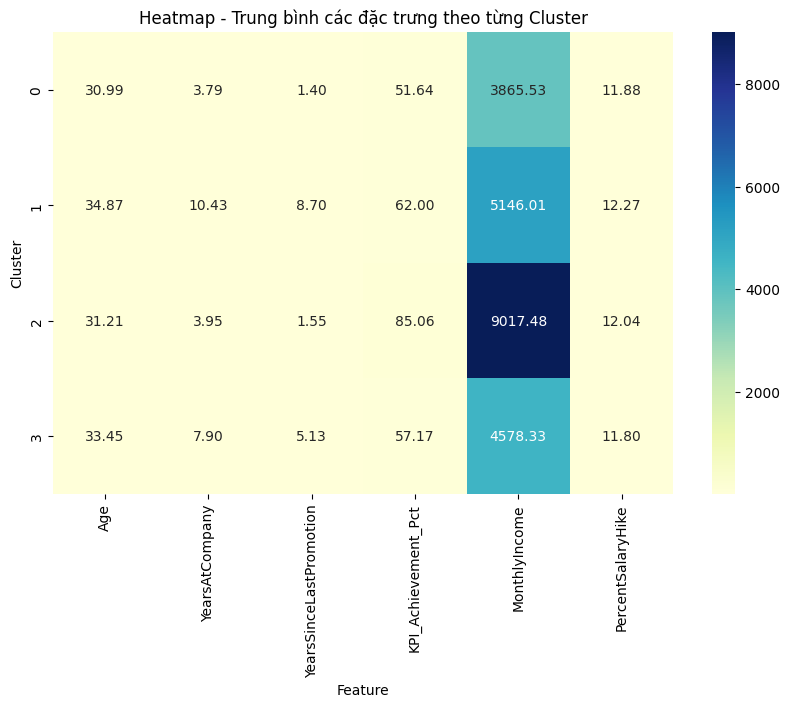

In [472]:

# Tính giá trị trung bình từng biến số theo từng cluster
mean_by_cluster = df.groupby('Cluster')[feature_cols].mean()

plt.figure(figsize=(10,6))
sns.heatmap(mean_by_cluster, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap - Trung bình các đặc trưng theo từng Cluster')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16756\2124868567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df, inner="box", palette="Set2")


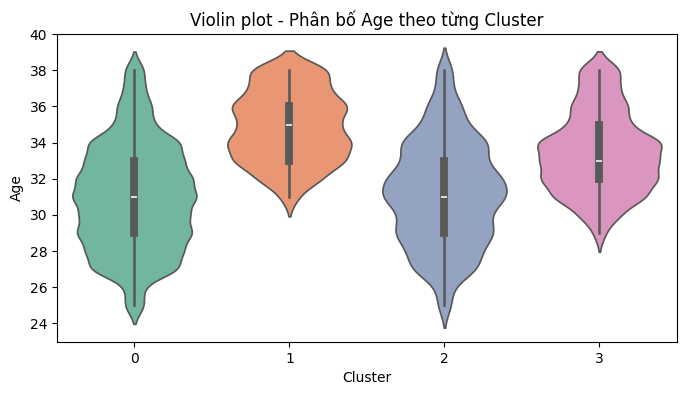

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16756\2124868567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df, inner="box", palette="Set2")


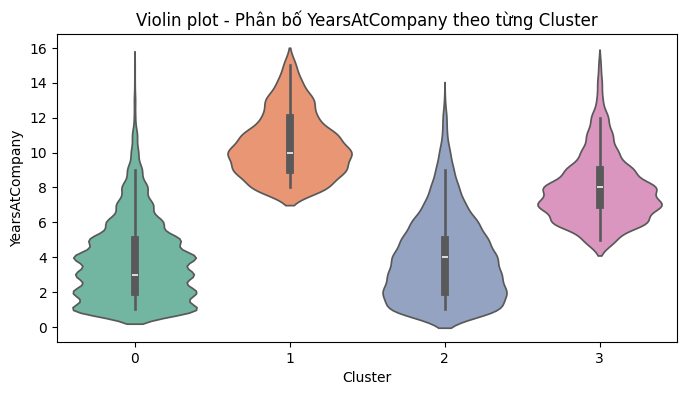

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16756\2124868567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df, inner="box", palette="Set2")


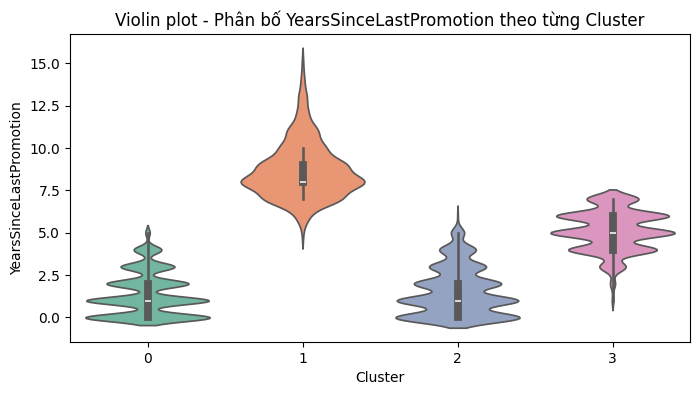

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16756\2124868567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df, inner="box", palette="Set2")


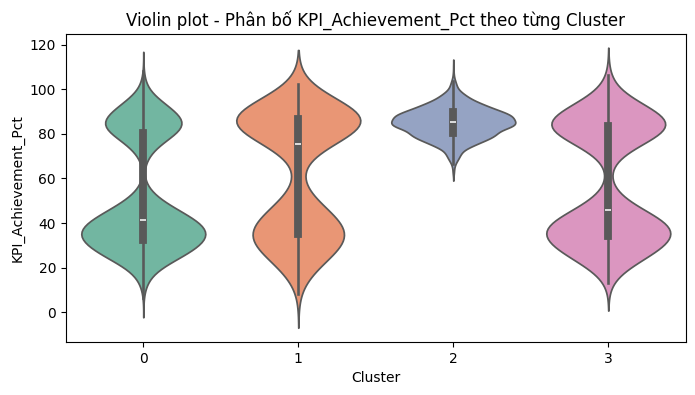

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16756\2124868567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df, inner="box", palette="Set2")


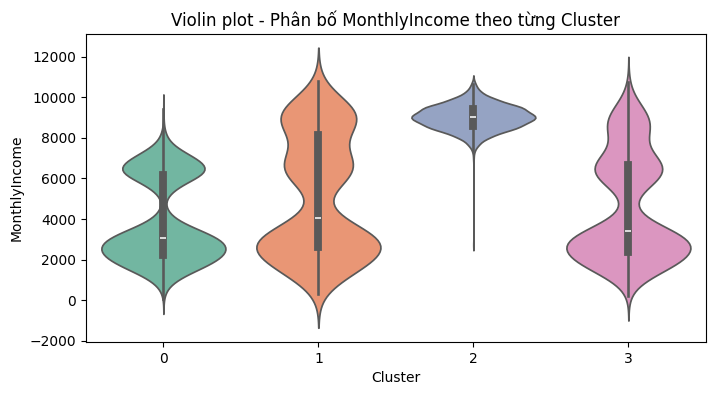

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16756\2124868567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df, inner="box", palette="Set2")


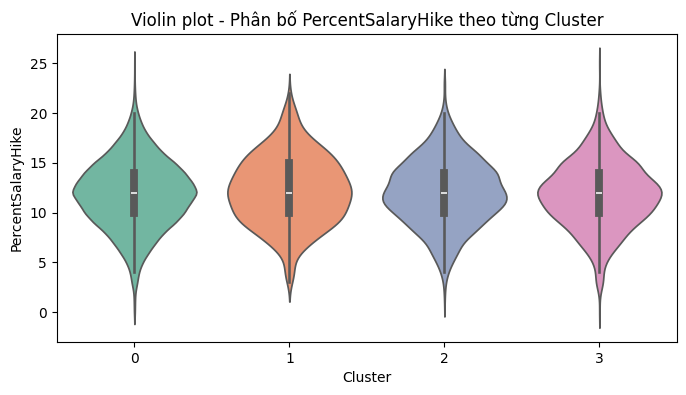

In [ ]:
for feature in feature_cols:
    plt.figure(figsize=(8,4))
    sns.violinplot(x='Cluster', y=feature, data=df, inner="box", palette="Set2")
    plt.title(f'Violin plot - Phân bố {feature} theo từng Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

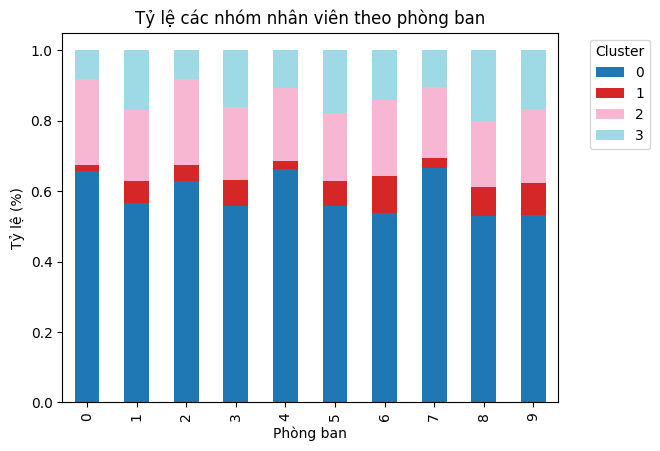

In [474]:
# Nếu có cột 'Department'
pivot_dept = pd.crosstab(df['Department_Raw'], df['Cluster'], normalize='index')  # Tính % theo từng phòng ban
pivot_dept.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Tỷ lệ các nhóm nhân viên theo phòng ban')
plt.ylabel('Tỷ lệ (%)')
plt.xlabel('Phòng ban')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
plt.show()


In [475]:
df['Department_Raw']

0       5
1       1
2       7
3       0
4       6
       ..
9995    0
9996    0
9997    0
9998    1
9999    7
Name: Department_Raw, Length: 9997, dtype: int32